# Emerging Programming Skills Analysis

## Chris Fair

### March 14, 2022

===============================================================================================================

# Contents
- [Identifying Potential Skills Gaps](#Identifying-Potential-Skills-Gaps)
- [Importing Data](#Importing-Data)
    - [Collecting Data Using Webscraping](#Collecting-Data-Using-Webscraping)
    - [Loading StackOverflow Survey Data](#Loading-StackOverflow-Survey-Data)
- [Data Wrangling](#Data-Wrangling)
    -[Normalizing Pay Data](#Normalizaing-Pay-Data)
    -[Imputing Missing Values](#Imputing-Missing-Values)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Distribution](#Distribution)
    - [Outliers](#Outliers)
    - [Re-examining Distribution After Removal of Outliers](#Re-examining-Distribution-After-Removal-of-Outliers)
    - [Correlations](#Correlations)
- [Exporting Data](#Exporting-Data)

# Identifying Potential Skills Gaps

The purpose of this analysis is to investigate current trends in technology usage and skills. More specifically, it is intended to look at current program language, database, webframe, and platform useage and see how those demands are expected to change in the future.

To accomplish this goal, data was taken from a [StackOverflow survey](https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in) and obtained from GitHub jobs via utilization of their API and webscraping. 

Importing necessary libraries

In [406]:
import requests
from bs4 import BeautifulSoup
import csv

import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

from scipy.stats import norm
import statistics as stats
import seaborn as sns

import datetime
!pip install forex-python
from forex_python.converter import CurrencyRates

Matplotlib version:  3.4.3


# Importing Data

For this project there were three separate data sources used. The first two, webscraping and importing survey response data, are carried out in this notebook. The third data source was obtained using the GitHub jobs API and is carried out in the notebook titled ["Collecting_Jobs_data_Using_API.ipynb"](https://github.com/TheFairestOne/Programming_Skills_Analysis), which is located in the same repository as this notebook.

## Collecting Data Using Webscraping

The below URL contains some basic average pay and programming language data that is being scraped and will be included as additional info in the report appendices.

In [407]:
#this url contains the programming language and pay data that needs to be scraped
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Downloading the webpage at the URL and creating a soup object.

In [408]:
data = requests.get(url).text
soup = BeautifulSoup(data,'html5lib')

Scraping the programming language name and annual average salary.

In [409]:
table = soup.find('table')
csv_data = list()
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as color_name
    avg_salary = cols[3].getText() # store the value in column 4 as color_code
    csv_data.append([language,avg_salary])
    print("{}--->{}".format(language,avg_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Saving the scraped data into a csv file to be used later.

In [410]:
with open('popular-languages.csv', 'w', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(csv_data)

## Loading StackOverflow Survey Data

The original dataset has around 90,000 responses and is availabele [here](https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01) under an ODbL: Open Database License. For this project, a randomized subset of the data (approximately 1/8th of the original data) was provided by IBM and is available [here](https://stackoverflow.blog/2019/04/09/the-2019-stack-overflow-developer-survey-results-are-in/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).

In [411]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

Loading dataset into a dataframe and looking at the first 5 rows to get a feel for the data

In [412]:
survey_data = pd.read_csv(dataset_url)

In [413]:
survey_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


Checking dimensions of the dataframe

In [414]:
print(len(survey_data.index))
print(len(survey_data.columns))

11552
85


Checking datatypes of dataframe

In [415]:
survey_data.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

Checking average age of respondents and seeing how many different countries had participants

In [416]:
print(survey_data['Age'].mean())
print(len(survey_data['Country'].unique()))

30.77239449133718
135


# Data Wrangling

Finding the number of duplicates and then removing them.

In [417]:
print(len(survey_data.index)-len(survey_data['Respondent'].unique()))
survey_data.drop_duplicates(inplace=True)

154


Verifying duplicates were dropped.

In [418]:
len(survey_data.index)-len(survey_data['Respondent'].unique())

0

Finding the missing values for all of the columns.

In [419]:
missing_data = survey_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")     

Respondent
False    11398
Name: Respondent, dtype: int64

MainBranch
False    11398
Name: MainBranch, dtype: int64

Hobbyist
False    11398
Name: Hobbyist, dtype: int64

OpenSourcer
False    11398
Name: OpenSourcer, dtype: int64

OpenSource
False    11317
True        81
Name: OpenSource, dtype: int64

Employment
False    11398
Name: Employment, dtype: int64

Country
False    11398
Name: Country, dtype: int64

Student
False    11347
True        51
Name: Student, dtype: int64

EdLevel
False    11286
True       112
Name: EdLevel, dtype: int64

UndergradMajor
False    10661
True       737
Name: UndergradMajor, dtype: int64

EduOther
False    11234
True       164
Name: EduOther, dtype: int64

OrgSize
False    11302
True        96
Name: OrgSize, dtype: int64

DevType
False    11333
True        65
Name: DevType, dtype: int64

YearsCode
False    11389
True         9
Name: YearsCode, dtype: int64

Age1stCode
False    11385
True        13
Name: Age1stCode, dtype: int64

YearsCodePro
False    113

## Normalizing Pay Data

Converting all weekly, monthly, and annual compensations to USD using conversion rates for 2019-02-01.

Note: Had to load the conversion rates into a dictionary rather than calling CurrencyRates using lambda as this kept getting stopped due to too many requests. This is a more efficient approach as well I believe.

Additionally, several of the currency conversion rates weren't found using the Forex library, so they will be entered using an exchange rate api, found [here](https://www.exchangerate-api.com). This API requires users to create an account to have an API key before the link will work.

Note: the required exchange rates were not available on the specified date, so rates on 3/14/2022 were used instead for the missing Forex rates.

In [420]:
# Note that an API key needs to be entered where indicated.
exchange_url = 'https://v6.exchangerate-api.com/v6/YOUR_KEY_HERE/latest/USD'

# Requesting data
response = requests.get(exchange_url)
data = response.json()

#print(data)
conversionRates2 = data['conversion_rates']

In [421]:
c = CurrencyRates()
rateDate = datetime.datetime(2019,2,1,12)
conversionRates = c.get_rates('USD', rateDate)

#print(conversionRates)
survey_data['Comp_USD'] = np.nan
errors = dict()
errors2 = dict()
#survey_data.assign(**{'In USD': survey_data.apply(convert_to_USD, axis=1)})
for ind in survey_data['CurrencySymbol'].index:
    try:
        survey_data['Comp_USD'][ind] = survey_data['CompTotal'][ind]/conversionRates[survey_data['CurrencySymbol'][ind]]
    except: 
        errors[survey_data['CurrencySymbol'][ind]] = errors.get(survey_data['CurrencySymbol'][ind],0)+1
        try:
            survey_data['Comp_USD'][ind] = survey_data['CompTotal'][ind]/conversionRates2[survey_data['CurrencySymbol'][ind]]
        except:
            errors2[survey_data['CurrencySymbol'][ind]] = errors2.get(survey_data['CurrencySymbol'][ind],0)+1
        
print(len(errors))
print(errors)
print(len(errors2))
print(errors2)

survey_data[['CompTotal','CurrencySymbol','ConvertedComp','Comp_USD']].head(10)

#survey_data['Amount_USD'] = survey_data.apply(convert_to_USD(survey_data[['CompTotal','CurrencySymbol']]), axis = 1)
#survey_data['Amount_USD'] = survey_data.apply(lambda x: c.convert( x.CurrencySymbol, 'USD', x.CompTotal, rateDate), axis = 1)

69
{'PKR': 83, 'ARS': 68, 'IRR': 81, 'AED': 20, 'XPF': 2, 'EGP': 34, 'MUR': 2, 'NGN': 40, 'MNT': 2, 'CLP': 21, 'GEL': 8, 'DOP': 14, 'CVE': 1, 'RSD': 36, 'BIF': 1, 'BDT': 55, 'UAH': 71, 'COP': 48, 'GTQ': 10, 'TWD': 22, 'YER': 1, 'BYN': 13, 'NPR': 14, 'KES': 20, 'LBP': 6, 'KWD': 2, 'MDL': 7, 'DZD': 3, 'XOF': 7, 'BND': 1, 'JOD': 7, 'ALL': 11, 'AZN': 5, 'LKR': 34, 'GHS': 5, 'PYG': 2, 'PEN': 12, 'CRC': 6, 'BAM': 9, 'VND': 9, 'RWF': 1, 'TND': 9, 'HNL': 3, 'QAR': 1, 'UYU': 9, 'XAF': 4, 'TMT': 1, 'AMD': 9, 'KGS': 4, 'ANG': 3, 'SOS': 1, 'CUP': 3, 'MKD': 6, 'UGX': 5, 'SYP': 2, 'MAD': 8, 'ETB': 4, 'TZS': 2, 'BOB': 3, 'SAR': 11, 'AFN': 2, 'BHD': 3, 'JMD': 1, 'MMK': 2, 'SDG': 2, 'LYD': 1, 'MZN': 1, 'IQD': 1, 'SZL': 1}
0
{}


,CompTotal,CurrencySymbol,ConvertedComp,Comp_USD
0,61000.0,USD,61000.0,61000.000000
1,138000.0,NZD,95179.0,95551.276634
2,90000.0,USD,90000.0,90000.000000
3,29000.0,GBP,455352.0,37850.332241
4,90000.0,AUD,65277.0,65386.661600
5,9500.0,BRL,31140.0,2587.853242
6,3000.0,EUR,41244.0,3441.300000
7,103000.0,USD,103000.0,103000.000000
8,69000.0,USD,69000.0,69000.000000
9,8000.0,ILS,26388.0,2203.366227


In [422]:
print(conversionRates2.get('GBP'))
print(conversionRates.get('GBP'))

0.767
0.7661755731845523


Checking counts of different payment schedules.

In [423]:
survey_data['CompFreq'].unique()
survey_data['CompFreq'].value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

Appending a normalized annual compensation column for making comparisons and to replace NaN values for compensation. Assumed 50 working weeks in a year.

In [424]:
pd.options.mode.chained_assignment = None #removing SettingWithCopyWarning that pops up. Not an issue.

survey_data['NormalizedAnnualCompensation'] = np.nan

for ind in survey_data['CompFreq'].index:
    if survey_data['CompFreq'][ind] == 'Yearly':
        survey_data['NormalizedAnnualCompensation'][ind]=survey_data['Comp_USD'][ind]
    elif survey_data['CompFreq'][ind] == 'Monthly':
        survey_data['NormalizedAnnualCompensation'][ind]=survey_data['Comp_USD'][ind]*12
    else :#for weekly pay
        survey_data['NormalizedAnnualCompensation'][ind]=survey_data['Comp_USD'][ind]*50
survey_data[['CompTotal','CompFreq','Comp_USD','NormalizedAnnualCompensation']].head()
survey_data['NormalizedAnnualCompensation'].median()

57813.840000000004

## Imputing Missing Values

Finding the value counts for the column WorkLoc.

In [425]:
survey_data['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Replacing all the empty rows in WorkLoc with the most common.

In [426]:
survey_data["WorkLoc"].replace(np.nan, 'Office', inplace=True)

Verifying if replacement was successful.

In [427]:
missing_data = survey_data.isnull()

missing_data['WorkLoc'].value_counts()

False    11398
Name: WorkLoc, dtype: int64

Finding missing values for "NormalizedAnnualCompensation".

In [428]:
missing_data2 = survey_data.isnull()
missing_data2['NormalizedAnnualCompensation'].value_counts()

False    10589
True       809
Name: NormalizedAnnualCompensation, dtype: int64

Replacing missing values with the median for "NormalizedAnnualCompensation" and verifying replacement was successful.

In [429]:
medianPay = survey_data['NormalizedAnnualCompensation'].median()
survey_data["NormalizedAnnualCompensation"].replace(np.nan, medianPay, inplace=True)

missing_data3 = survey_data.isnull()
missing_data3['NormalizedAnnualCompensation'].value_counts()

False    11398
Name: NormalizedAnnualCompensation, dtype: int64

# Exploratory Data Analysis

## Distribution

The column "NormalizedAnnualCompensation" contains salary converted to annualized USD salaries, assuming 12 working months and 50 working weeks.
The distribution curve for the column "NormalizedAnnualCompensation" is below.

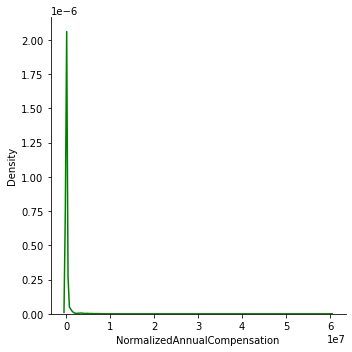

In [430]:
sns.displot(data=survey_data, x='NormalizedAnnualCompensation', kind='kde',color='green')
plt.show()

Plotting the same data as a histogram

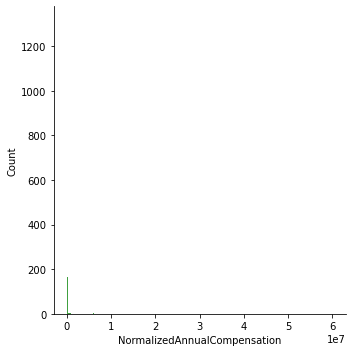

In [431]:
sns.displot(data=survey_data, x='NormalizedAnnualCompensation',kind='hist',color='green')
plt.show()

Looking at the mean, median, and standard deviation for the "NormalizedAnnualCompensation" column.

In [432]:
print("Median Compensation: ", survey_data['NormalizedAnnualCompensation'].median())
print("Mean Compensation: ", survey_data['NormalizedAnnualCompensation'].mean())
print("Compensation Standard Deviation: ", survey_data['NormalizedAnnualCompensation'].std())

Median Compensation:  57813.840000000004
Mean Compensation:  183913.58938740665
Compensation Standard Deviation:  1066576.036111601


Looking at the gender of respondents, we can see that the vast majority of respondents were men.

In [433]:
survey_data['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Exploring the gender wage gap.

In [434]:
dfW = survey_data[survey_data['Gender']=='Woman']
print("Median Pay for Women: ", dfW['NormalizedAnnualCompensation'].median())
print("Mean Pay for Women: ", dfW['NormalizedAnnualCompensation'].mean())
print("Number of Respondents Identifying as Women: ", len(dfW.index))
print("")
dfM = survey_data[survey_data['Gender']=='Man']
print("Median Pay for Men: ", dfM['NormalizedAnnualCompensation'].median())
print("Mean Pay for Men: ", dfM['NormalizedAnnualCompensation'].mean())
print("Number of Respondents Identifying as Men: ", len(dfM.index))

Median Pay for Women:  57813.840000000004
Mean Pay for Women:  115535.04534321668
Number of Respondents Identifying as Women:  731

Median Pay for Men:  57813.840000000004
Mean Pay for Men:  188477.22147390075
Number of Respondents Identifying as Men:  10480


Looking at the 5 number summary for the "Age" column.

In [435]:
dfA = survey_data['Age']
dfA.min()
q1 = dfA.quantile(0.25)
dfA.median()
q3 = dfA.quantile(0.75)
dfA.max()

99.0

Visualizing the "Age" column as a histogram.

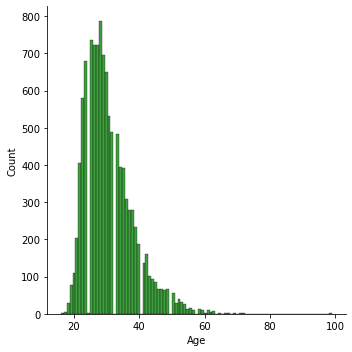

In [436]:
sns.displot(data=survey_data, x='Age',kind='hist',color='green')
plt.show()

## Outliers

Using a boxplot to check if any outliers exist in the "ConvertedComp" Column.

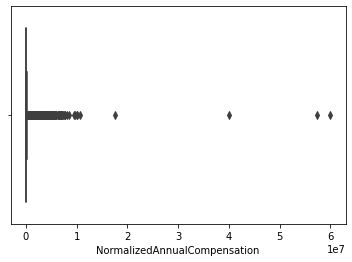

In [437]:
ax = sns.boxplot(x="NormalizedAnnualCompensation", data=survey_data)

Inter Quartile Range for the column "ConvertedComp".

In [438]:
q1 = survey_data['NormalizedAnnualCompensation'].quantile(0.25)
survey_data['NormalizedAnnualCompensation'].median()
q3 = survey_data['NormalizedAnnualCompensation'].quantile(0.75)
IQR = q3-q1
print(IQR)

66285.95485162934


Finding the upper and lower bounds.

In [439]:
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print(lower, upper)

-70714.88712907337 194428.93227744402


Identifying how many outliers there are in the "NormalizedAnnualCompensation" column.

In [440]:
survey_data[(survey_data['NormalizedAnnualCompensation'] < lower) | (survey_data['NormalizedAnnualCompensation'] > upper)].NormalizedAnnualCompensation.count()

934

Removing outliers and creating a new dataframe.

In [441]:
dfNoOutliers = survey_data[(survey_data['NormalizedAnnualCompensation'] >= lower) & (survey_data['NormalizedAnnualCompensation'] <= upper)] #this gave a length of 9703
print("Number of Outliers Removed: ", len(survey_data.index)-len(dfNoOutliers.index))

Number of Outliers Removed:  934


## Re-examining Distribution After Removal of Outliers

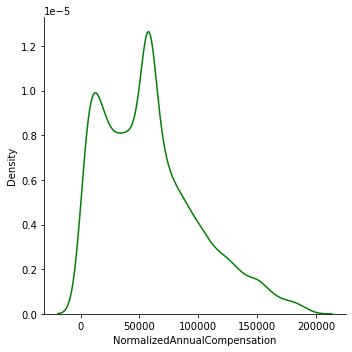

In [442]:
sns.displot(data=dfNoOutliers, x='NormalizedAnnualCompensation', kind='kde',color='green')
plt.show()

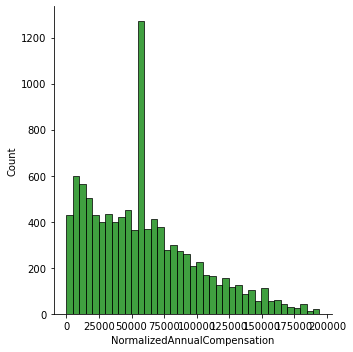

In [443]:
sns.displot(data=dfNoOutliers, x='NormalizedAnnualCompensation',kind='hist',color='green')
plt.show()

Looking at the mean, median, and standard deviation for the "NormalizedAnnualCompensation" column after removing outliers.

In [444]:
print("Median Compensation: ", dfNoOutliers['NormalizedAnnualCompensation'].median())
print("Mean Compensation: ", dfNoOutliers['NormalizedAnnualCompensation'].mean())
print("Compensation Standard Deviation: ", dfNoOutliers['NormalizedAnnualCompensation'].std())

Median Compensation:  57355.0
Mean Compensation:  58875.30629911383
Compensation Standard Deviation:  40779.24939644233


Looking at the gender counts, removal of outliers did not seem to disproportionately affect any gender group.

In [445]:
dfNoOutliers['Gender'].value_counts()

Man                                                            9598
Woman                                                           692
Non-binary, genderqueer, or gender non-conforming                56
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         9
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

In [446]:
dfW = dfNoOutliers[dfNoOutliers['Gender']=='Woman']
print("Median Pay for Women: ", dfW['NormalizedAnnualCompensation'].median())
print("Mean Pay for Women: ", dfW['NormalizedAnnualCompensation'].mean())
print("Number of Respondents Identifying as Women: ", len(dfW.index))
print("")
dfM = dfNoOutliers[dfNoOutliers['Gender']=='Man']
print("Median Pay for Men: ", dfM['NormalizedAnnualCompensation'].median())
print("Mean Pay for Men: ", dfM['NormalizedAnnualCompensation'].mean())
print("Number of Respondents Identifying as Men: ", len(dfM.index))

Median Pay for Women:  57813.840000000004
Mean Pay for Women:  60037.05594762821
Number of Respondents Identifying as Women:  692

Median Pay for Men:  57355.0
Mean Pay for Men:  58718.83843403932
Number of Respondents Identifying as Men:  9598


## Correlations

Find the correlation between "Age" and all other numerical columns.

In [447]:
dfNoOutliers.corr()['Age']

Respondent                      0.004115
CompTotal                       0.006645
ConvertedComp                   0.403034
WorkWeekHrs                     0.037284
CodeRevHrs                     -0.017195
Age                             1.000000
Comp_USD                        0.339989
NormalizedAnnualCompensation    0.387074
Name: Age, dtype: float64

Find the correlation between "NormalizedAnnualCompensation" and all other numerical columns.

In [448]:
dfNoOutliers.corr()['NormalizedAnnualCompensation']

Respondent                      0.013446
CompTotal                      -0.065367
ConvertedComp                   0.994309
WorkWeekHrs                     0.030370
CodeRevHrs                     -0.086295
Age                             0.387074
Comp_USD                        0.900355
NormalizedAnnualCompensation    1.000000
Name: NormalizedAnnualCompensation, dtype: float64

# Exporting data

The data was exported and visualized using IBM Cognos Analytics. The results of this visualization are available [here](https://dataplatform.cloud.ibm.com/dashboards/eef55238-e891-4854-8c71-7e249454b9dc/view/5266d52125b42adf16b0dce4079a290e7b632755b2bb840783817b495c652797a86d41c3c8791e0ed9165636a7bd4458c1)

In [449]:
dfNoOutliers.to_excel("SurveyData_Cleaned_ForCognos.xlsx")